<a href="https://colab.research.google.com/github/gmn-data-platform/gmn-data-endpoints/blob/main/gmn_data_analysis_template.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Global Meteor Network Data Analysis Template

Starter template for GMN data analysis. Using [gmn-python-api](https://github.com/gmn-data-platform/gmn-python-api) (<a href="https://gmn-python-api.readthedocs.io/en/latest/">docs</a>) and [WesternMeteorPyLib](https://github.com/wmpg/WesternMeteorPyLib).

**Click on "Copy to Drive" above to allow changes to be saved.**

In [ ]:
# Setup
!pip install --user gmn-python-api==0.0.6 &> /dev/null && echo "Installed gmn-python-api."
!pip install --user git+http://github.com/wmpg/WesternMeteorPyLib.git@74aba1320ba9281579b816a9fceb9d7463ef1bbd &> /dev/null && echo "Installed wmpl."
!apt install proj-bin libproj-dev libgeos-dev &> /dev/null && echo "Installed apt dependencies."
!pip install --user --upgrade "basemap == 1.3.0b1" "basemap-data == 1.3.0b1" "jplephem" &> /dev/null && echo "Installed new requests library."
!echo && echo "Setup complete. Restarting runtime (ignore the crash report), please run the cell below next."
import os; os.kill(os.getpid(), 9)

Installed gmn-python-api.
Installed wmpl.
Installed apt dependencies.
Installed new requests library.

Setup complete. Restarting runtime (ignore the crash report), please run the cell below next.


---

## Load meteor trajectory summary data into Pandas using gmn-python-api

In [1]:
# Imports
from datetime import datetime
from gmn_python_api.data_directory import get_all_file_content
from gmn_python_api.meteor_summary_reader import read_meteor_summary_csv_as_dataframe

In [2]:
# Load into Pandas
trajectory_summary_dataframe = read_meteor_summary_csv_as_dataframe(
    get_all_file_content(),
    csv_data_directory_format=True,
)

# The following data was recorded for the 24th and 25th of July 2019
trajectory_summary_dataframe = trajectory_summary_dataframe.loc[
    (trajectory_summary_dataframe["Beginning (UTC Time)"] >= "2019-07-24")
    & (trajectory_summary_dataframe["Beginning (UTC Time)"] <= "2019-07-25")
]

In [3]:
print(f"{trajectory_summary_dataframe['Vgeo (km/s)'].max()} km/s "
       "was the fastest geostationary velocity out of recorded meteors for the 24th and 25th.")
# 70.88645 km/s was the fastest geostationary velocity out of recorded meteors for the 24th and 25th.

print(f"{trajectory_summary_dataframe.loc[trajectory_summary_dataframe['IAU (code)'] == 'PER'].shape[0]} "
       "meteors were estimated to be part of the Perseids shower.")
# 8 meteors were estimated to be part of the Perseids shower.

print(f"Station {trajectory_summary_dataframe['Num (stat)'].mode().values[0]} "
       "recorded the highest number of meteors.")
# Station 2 recorded the highest number of meteor.

70.88645 km/s was the fastest geostationary velocity out of recorded meteors for the 24th and 25th.
10 meteors were estimated to be part of the Perseids shower.
Station 2 recorded the highest number of meteors.


---

## WesternMeteorPyLib skyplot

Below is a skyplot (BEThel (deg) on y-axis, LAMgeo (deg) on x-axis) of meteors recorded on the 24th of July 2019. wmpl is used for rendering the plot. The red points indicate meteors estimated to be part of the Perseids shower.

Loaded leap seconds from a local file: /root/.local/lib/python3.7/site-packages/wmpl/share/tai-utc.dat


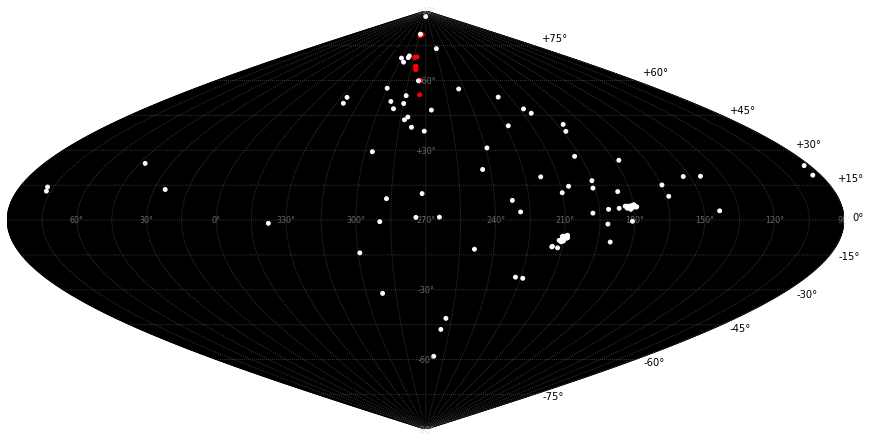

In [4]:
%matplotlib inline

import numpy as np
from wmpl.Utils.PlotCelestial import CelestialPlot
import matplotlib.pyplot as plt

ra = []
dec = []

ra.append(np.deg2rad((trajectory_summary_dataframe['LAMgeo (deg)'] - trajectory_summary_dataframe['Sol lon (deg)']) % 360))
dec.append(np.deg2rad(trajectory_summary_dataframe['BEThel (deg)']))
colors = ["red" if str(x) == "PER" else "white" for x in trajectory_summary_dataframe['IAU (code)']]

plt.rcParams['figure.figsize'] = 15, 25
celes_plot = CelestialPlot(ra, dec, projection='sinu', lon_0=-90)
celes_plot.scatter(ra, dec, c=colors, s=15)

---

## D-Tale
[D-Tale](https://github.com/man-group/dtale) is a visualiser for Pandas data structures. It can be used to explore and create plots for `trajectory_summary_dataframe`. Run the cells below and click on the link generated to access D-Tale.

In [ ]:
!pip install --user "dtale==1.61.1" &> /dev/null && echo "Installed D-Tale."

In [ ]:
import dtale
import dtale.app as dtale_app

dtale_app.USE_COLAB = True

dtale.show(trajectory_summary_dataframe)